<a href="https://colab.research.google.com/github/omerjamil13/Python-project/blob/main/Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample_data/QueryResults (1).csv")
print(df)

                        m     TagName  Unnamed: 2
0     2008-07-01 00:00:00          c#           3
1     2008-08-01 00:00:00    assembly           8
2     2008-08-01 00:00:00  javascript         162
3     2008-08-01 00:00:00           c          85
4     2008-08-01 00:00:00      python         124
...                   ...         ...         ...
1986  2020-07-01 00:00:00           r        5694
1987  2020-07-01 00:00:00          go         743
1988  2020-07-01 00:00:00        ruby         775
1989  2020-07-01 00:00:00        perl         182
1990  2020-07-01 00:00:00       swift        3607

[1991 rows x 3 columns]


In [ ]:
df = df.rename(columns={'m':'DATE','TagName':'TAG','Unnamed: 2':'POSTS'})

In [ ]:
df.head(5)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
df.tail(5)

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [ ]:
df.shape

(1991, 3)

In [ ]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [ ]:
by_tag_sum = df.groupby('TAG').sum()
by_tag_sum

<ipython-input-10-239a007791f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_tag_sum = df.groupby('TAG').sum()


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [ ]:
by_tag_sum.sort_values('POSTS', ascending = False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


In [ ]:
by_tag_count = df.groupby('TAG').count()
by_tag_count

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [ ]:
by_tag_count.sort_values('TAG', ascending = False)

,DATE,POSTS
TAG,,
swift,135,135
ruby,144,144
r,142,142
python,144,144
php,144,144
perl,144,144
javascript,144,144
java,144,144
go,129,129


In [ ]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [ ]:
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [ ]:
reshaped_df = df.pivot(index='DATE', columns = 'TAG', values = 'POSTS')

In [ ]:
reshaped_df.shape

(145, 14)

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [ ]:
for col in reshaped_df.columns:
  print(col)

assembly
c
c#
c++
delphi
go
java
javascript
perl
php
python
r
ruby
swift


In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.shape

(145, 14)

In [ ]:
reshaped_df.isna()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2008-08-01,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2008-09-01,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2008-10-01,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2008-11-01,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-04-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-05-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
reshaped_df.fillna(0 , inplace = True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [ ]:
reshaped_df.isna().values.any()

False

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20,30))

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

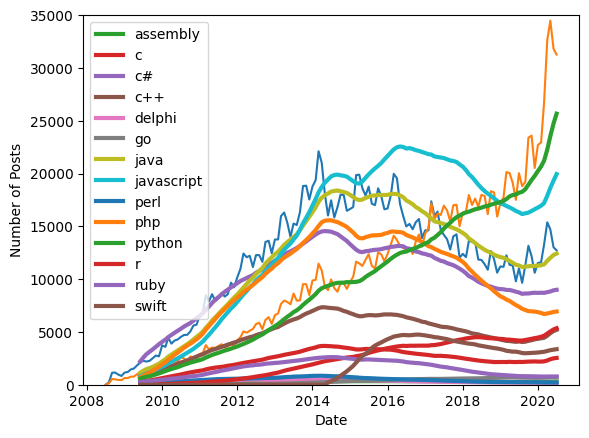

In [ ]:
df_roll = reshaped_df.rolling(window=12).mean()
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0,35000)
for column in df_roll.columns:
  plt.plot(df_roll.index, df_roll[column],linewidth = 3, label= column)

plt.legend(fontsize = 10)